In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(0)
num_samples = 100
age = np.random.randint(20, 66, size=num_samples)
experience = np.random.randint(0, age.max() + 1, size=num_samples)
salary = 3000 + 1000 * experience + np.random.normal(0, 1000, size=num_samples)
data = pd.DataFrame({'Age': age, 'Experience': experience, 'Salary': salary})
print(data)

    Age  Experience        Salary
0    64          50  53672.294757
1    20          36  39407.461836
2    23          34  36230.083926
3    23          48  51539.249191
4    59           3   5325.667339
..  ...         ...           ...
95   20           9  12481.481474
96   51          41  42459.202986
97   25          23  26063.261994
98   50           3   6156.506538
99   20          46  49232.181036

[100 rows x 3 columns]


getting the values as np arrays to perform calculations

In [ ]:
m = data['Experience']
n = data['Salary']

Linear regression

calculating the slope value of the variables with the formula

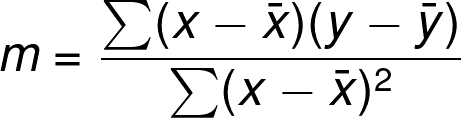

In [ ]:
exp_mean = np.mean(m)
sal_mean = np.mean(n)

M = np.array([])
t1=0
t2=0
t3=0

for i in range(len(m)):
    t1 += (m[i]-exp_mean) * (n[i]-sal_mean)
    t2 += (m[i]-exp_mean) * (m[i]-exp_mean)
    t3 = t1 /t2
    M = np.append(M,t3)

calculating the constant value using the formula (ymean - slope * xmean)

In [ ]:
t4 = 0
C = np.array([])
for i in range(len(m)):
    t4 = (sal_mean - (M[i]*exp_mean))
    C = np.append(C,t4)

Linear regression calculation

In [ ]:
# Ycap = M[i]*x[i] + C[i]
ycap = np.array([])
for i in range(len(m)):
  a = M[i]*m[i] + C[i]
  ycap = np.append(ycap,a)

<Axes: xlabel='Experience', ylabel='Salary'>

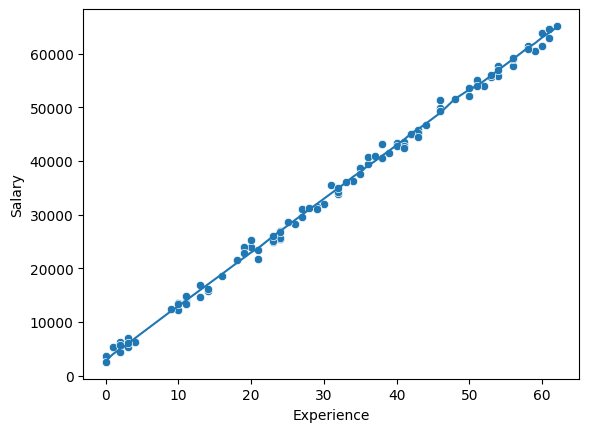

In [ ]:
m = data['Experience']
n = data['Salary']
sns.scatterplot(x = m, y = n)
sns.lineplot(x = m, y = ycap)

Multiple regression


In [ ]:
m = data['Experience']
o = data['Salary']
n = data['Age']

Regression coefficient using formula

β₁ = Σ(X₁ - ¯X₁)(Y - ¯Y) / Σ(X₁ - ¯X₁)²

β₂ = Σ(X₂ - ¯X₂)(Y - ¯Y) / Σ(X₂ - ¯X₂)²

In [ ]:
exp_mean = np.mean(m)
sal_mean = np.mean(o)
age_mean = np.mean(n)

t1 = 0
t2 = 0
t3 = 0
t4 = 0
t5 = 0
t6 = 0
B1 = np.array([])
B2 = np.array([])

for i in range(len(m)):
  t1 += (m[i]-exp_mean) * (o[i]-sal_mean)
  t2 += (m[i]-exp_mean) * (m[i]-exp_mean)
  t3 += (n[i]-age_mean) * (o[i]-sal_mean)
  t4 += (n[i]-age_mean) * (n[i]-age_mean)
  t5 = t1/t2
  t6 = t3/t4
  B1 = np.append(B1,t5)
  B2 = np.append(B2,t6)

In [ ]:
t7 = 0
B0 = np.array([])
for i in range(len(m)):
    t7 = (sal_mean - (B1[i]*exp_mean) - (B2[i]*age_mean))
    B0 = np.append(C,t4)

In [ ]:
yreg = np.array([])
for i in range(len(m)):
  a = (B1[i]*m[i])+ (B2[i]*n[i]) + B0[i]
  yreg = np.append(yreg,a)

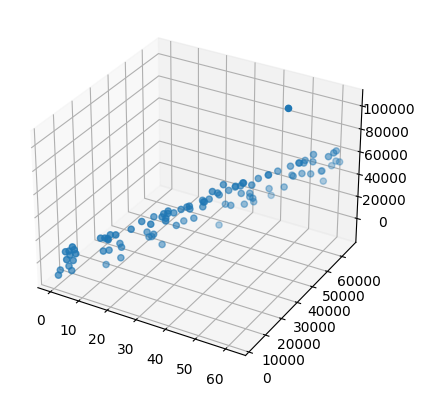

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection ='3d')
x = m
y = o
z = yreg
ax.scatter( x ,y, z, 'green')
plt.show()

Saving Position_Salaries.csv to Position_Salaries (1).csv
Summation Matrix:
[ 10.  55. 385.]
[  55.  385. 3025.]
[  385.  3025. 25333.]

Inverse of the Summation Matrix:
[[ 1.38333333 -0.525       0.04166667]
 [-0.525       0.24128788 -0.02083333]
 [ 0.04166667 -0.02083333  0.00189394]]

Y Matrix:
[[  2495000]
 [ 20395000]
 [179715000]]

Result Matrix (Rounded):
[[ 232166.66666667]
 [-132871.21212121]
 [  19431.81818182]]


Text(0, 0.5, 'Salary')

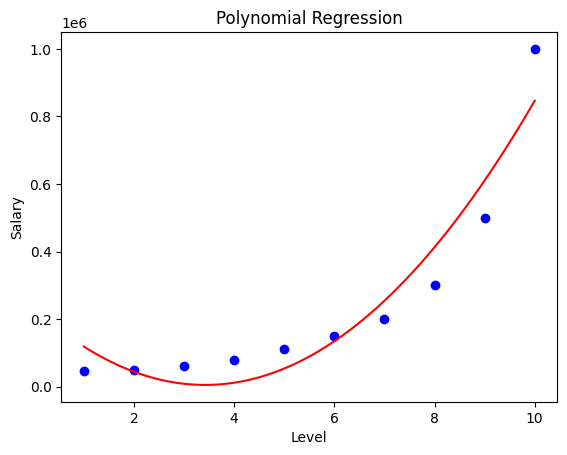

In [ ]:
from google.colab import files
uploaded=files.upload()
Data=pd.read_csv("Position_Salaries.csv")
x_values = Data['Level']
y_values = Data['Salary']


def generate_summation_matrix(x_values):
    degree = 3
    matrix = np.zeros((degree, degree))
    for i in range(degree):
        for j in range(degree):
            matrix[i][j] = np.sum(np.power(x_values, i + j))
    return matrix

##Summation matrix printing
matrix = generate_summation_matrix(x_values)
print("Summation Matrix:")
for row in matrix:
  print(row)

matrix_np = np.array(matrix)
try:
  inverse_matrix_np = np.linalg.inv(matrix_np)
  print("\nInverse of the Summation Matrix:")
  print(inverse_matrix_np)
except np.linalg.LinAlgError:
  print("\nError: The matrix is singular and cannot be inverted.")

## formula to find y value matrix using regression method
y_matrix = np.array([[sum(y_values)], [sum(x * y for x, y in zip(x_values, y_values))], [sum(x * x * y for x, y in zip(x_values, y_values))]])

print("\nY Matrix:")
print(y_matrix)
result_matrix = np.dot(inverse_matrix_np, y_matrix)
result_matrix_rounded = np.round(result_matrix, decimals=10)
print("\nResult Matrix (Rounded):")
print(result_matrix_rounded)


def polynomial_function(x, coefficients):
    return coefficients[0] + coefficients[1] * x + coefficients[2] * x ** 2


x = np.linspace(min(x_values), max(x_values), 100)
y = polynomial_function(x, result_matrix_rounded.flatten())
plt.scatter(x_values, y_values, color='blue')
plt.plot(x, y, color='red')
plt.title('Polynomial Regression')
plt.xlabel('Level')
plt.ylabel('Salary')

Probabilities: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


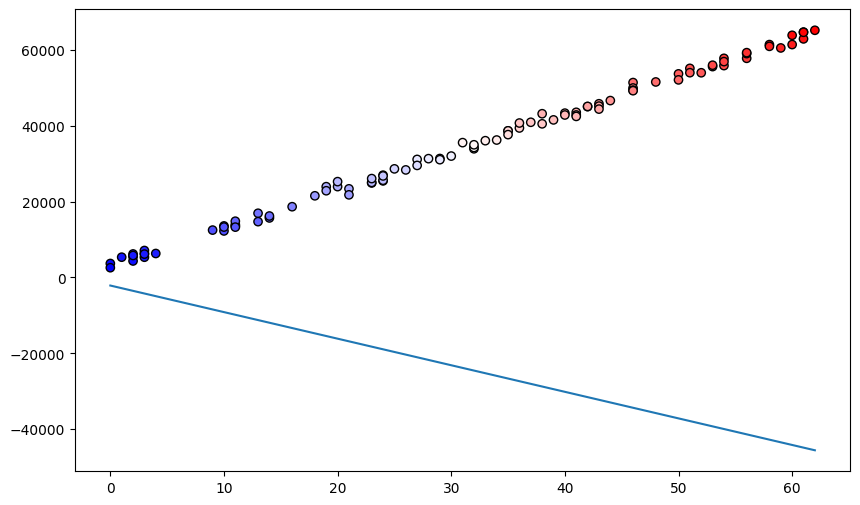